# Statistics (Milk Production in EU)

In [1]:
#importing libraries

import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from matplotlib import colors as mcolors

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

import scipy.stats as stats
from statsmodels.stats import weightstats

%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 


In [2]:
df=pd.read_csv('Milk_Production_new_data.csv')

In [3]:
df.head(11)

,Country,Year,Amount
0,Belgium,2011,3151.00
1,Bulgaria,2011,1126.00
2,Czechia,2011,2735.93
3,Denmark,2011,4879.50
4,Germany,2011,30301.36
5,Estonia,2011,692.40
6,Ireland,2011,5556.20
7,Greece,2011,757.00
8,Spain,2011,6487.68
9,France,2011,25091.93


#### <font color=red>*The unit of the values in the 'Amount' column is in tonnes*</font> 

In [4]:
df1= df.pivot(index="Country", columns="Year", values="Amount")
df1

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,
Austria,3307.13,3382.10,3393.06,3493.86,3537.76,3627.61,3712.73,3821.19,3781.34,3815.47,3830.14
Belgium,3151.00,3116.00,3529.00,3710.00,3826.00,3933.00,4060.00,4195.00,4293.00,4449.00,4434.00
Bulgaria,1126.00,1093.00,1149.00,1103.00,1028.04,1018.58,968.18,898.77,822.30,881.76,835.78
Croatia,804.00,810.00,717.00,712.00,694.00,671.00,648.00,618.00,599.00,596.00,558.00
Cyprus,156.02,153.74,163.27,164.64,165.30,186.02,216.39,228.08,238.76,275.16,298.14
Czechia,2735.93,2814.68,2849.43,2933.46,3025.88,3064.73,3079.21,3161.51,3155.79,3267.73,3309.91
Denmark,4879.50,5006.40,5081.80,5162.00,5335.70,5435.70,5502.20,5615.20,5615.00,5666.00,5644.00
Estonia,692.40,720.70,771.60,804.80,782.70,782.70,790.00,796.90,820.80,848.30,838.70
Finland,2300.73,2296.68,2327.80,2400.01,2436.76,2429.59,2405.76,2397.88,2374.36,2406.52,2161.46


###  <font color=blue>**A. Descriptive Statistics**</font>

#### <font color=red>*Mean, median, and variance values will be calculated*</font> 

In [5]:
# adding a column for mean values for each country
df1['mean_rows'] =df1.mean(axis = 1)
df1

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean_rows
Country,,,,,,,,,,,,
Austria,3307.13,3382.10,3393.06,3493.86,3537.76,3627.61,3712.73,3821.19,3781.34,3815.47,3830.14,3609.308182
Belgium,3151.00,3116.00,3529.00,3710.00,3826.00,3933.00,4060.00,4195.00,4293.00,4449.00,4434.00,3881.454545
Bulgaria,1126.00,1093.00,1149.00,1103.00,1028.04,1018.58,968.18,898.77,822.30,881.76,835.78,993.128182
Croatia,804.00,810.00,717.00,712.00,694.00,671.00,648.00,618.00,599.00,596.00,558.00,675.181818
Cyprus,156.02,153.74,163.27,164.64,165.30,186.02,216.39,228.08,238.76,275.16,298.14,204.138182
Czechia,2735.93,2814.68,2849.43,2933.46,3025.88,3064.73,3079.21,3161.51,3155.79,3267.73,3309.91,3036.205455
Denmark,4879.50,5006.40,5081.80,5162.00,5335.70,5435.70,5502.20,5615.20,5615.00,5666.00,5644.00,5358.500000
Estonia,692.40,720.70,771.60,804.80,782.70,782.70,790.00,796.90,820.80,848.30,838.70,786.327273
Finland,2300.73,2296.68,2327.80,2400.01,2436.76,2429.59,2405.76,2397.88,2374.36,2406.52,2161.46,2357.959091


In [6]:
# adding a column for median values for each country
df1['median_rows'] = df1.median(axis = 1)
df1

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean_rows,median_rows
Country,,,,,,,,,,,,,
Austria,3307.13,3382.10,3393.06,3493.86,3537.76,3627.61,3712.73,3821.19,3781.34,3815.47,3830.14,3609.308182,3618.459091
Belgium,3151.00,3116.00,3529.00,3710.00,3826.00,3933.00,4060.00,4195.00,4293.00,4449.00,4434.00,3881.454545,3907.227273
Bulgaria,1126.00,1093.00,1149.00,1103.00,1028.04,1018.58,968.18,898.77,822.30,881.76,835.78,993.128182,1005.854091
Croatia,804.00,810.00,717.00,712.00,694.00,671.00,648.00,618.00,599.00,596.00,558.00,675.181818,673.090909
Cyprus,156.02,153.74,163.27,164.64,165.30,186.02,216.39,228.08,238.76,275.16,298.14,204.138182,195.079091
Czechia,2735.93,2814.68,2849.43,2933.46,3025.88,3064.73,3079.21,3161.51,3155.79,3267.73,3309.91,3036.205455,3050.467727
Denmark,4879.50,5006.40,5081.80,5162.00,5335.70,5435.70,5502.20,5615.20,5615.00,5666.00,5644.00,5358.500000,5397.100000
Estonia,692.40,720.70,771.60,804.80,782.70,782.70,790.00,796.90,820.80,848.30,838.70,786.327273,788.163636
Finland,2300.73,2296.68,2327.80,2400.01,2436.76,2429.59,2405.76,2397.88,2374.36,2406.52,2161.46,2357.959091,2386.120000


In [7]:
# adding a column for variance values for each country
df1['variance_rows'] = df1.var(axis = 1)
df1

Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean_rows,median_rows,variance_rows
Country,,,,,,,,,,,,,,
Austria,3307.13,3382.10,3393.06,3493.86,3537.76,3627.61,3712.73,3821.19,3781.34,3815.47,3830.14,3609.308182,3618.459091,3.208437e+04
Belgium,3151.00,3116.00,3529.00,3710.00,3826.00,3933.00,4060.00,4195.00,4293.00,4449.00,4434.00,3881.454545,3907.227273,1.838687e+05
Bulgaria,1126.00,1093.00,1149.00,1103.00,1028.04,1018.58,968.18,898.77,822.30,881.76,835.78,993.128182,1005.854091,1.182356e+04
Croatia,804.00,810.00,717.00,712.00,694.00,671.00,648.00,618.00,599.00,596.00,558.00,675.181818,673.090909,5.671973e+03
Cyprus,156.02,153.74,163.27,164.64,165.30,186.02,216.39,228.08,238.76,275.16,298.14,204.138182,195.079091,2.150042e+03
Czechia,2735.93,2814.68,2849.43,2933.46,3025.88,3064.73,3079.21,3161.51,3155.79,3267.73,3309.91,3036.205455,3050.467727,2.884646e+04
Denmark,4879.50,5006.40,5081.80,5162.00,5335.70,5435.70,5502.20,5615.20,5615.00,5666.00,5644.00,5358.500000,5397.100000,6.707074e+04
Estonia,692.40,720.70,771.60,804.80,782.70,782.70,790.00,796.90,820.80,848.30,838.70,786.327273,788.163636,1.801166e+03
Finland,2300.73,2296.68,2327.80,2400.01,2436.76,2429.59,2405.76,2397.88,2374.36,2406.52,2161.46,2357.959091,2386.120000,5.574867e+03


In [8]:
#reseting index
df2=df1.reset_index()
df2

Year,Country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean_rows,median_rows,variance_rows
0,Austria,3307.13,3382.10,3393.06,3493.86,3537.76,3627.61,3712.73,3821.19,3781.34,3815.47,3830.14,3609.308182,3618.459091,3.208437e+04
1,Belgium,3151.00,3116.00,3529.00,3710.00,3826.00,3933.00,4060.00,4195.00,4293.00,4449.00,4434.00,3881.454545,3907.227273,1.838687e+05
2,Bulgaria,1126.00,1093.00,1149.00,1103.00,1028.04,1018.58,968.18,898.77,822.30,881.76,835.78,993.128182,1005.854091,1.182356e+04
3,Croatia,804.00,810.00,717.00,712.00,694.00,671.00,648.00,618.00,599.00,596.00,558.00,675.181818,673.090909,5.671973e+03
4,Cyprus,156.02,153.74,163.27,164.64,165.30,186.02,216.39,228.08,238.76,275.16,298.14,204.138182,195.079091,2.150042e+03
5,Czechia,2735.93,2814.68,2849.43,2933.46,3025.88,3064.73,3079.21,3161.51,3155.79,3267.73,3309.91,3036.205455,3050.467727,2.884646e+04
6,Denmark,4879.50,5006.40,5081.80,5162.00,5335.70,5435.70,5502.20,5615.20,5615.00,5666.00,5644.00,5358.500000,5397.100000,6.707074e+04
7,Estonia,692.40,720.70,771.60,804.80,782.70,782.70,790.00,796.90,820.80,848.30,838.70,786.327273,788.163636,1.801166e+03
8,Finland,2300.73,2296.68,2327.80,2400.01,2436.76,2429.59,2405.76,2397.88,2374.36,2406.52,2161.46,2357.959091,2386.120000,5.574867e+03
9,France,25091.93,24718.38,24459.76,25728.32,25820.27,25138.93,25055.20,25055.10,25062.00,25234.84,24778.84,25103.960909,25076.965000,1.331658e+05


In [9]:
df2.to_excel('Milk_Production_pivot.xlsx', index = False)

###  <font color=blue>**B. Visualisations**</font>
#### <font color=barney>*B.1. European Union Countries 2011-2021*</font>

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#### <div class="alert alert-warning"> Average Milk Production and Utilisation in EU for 2011-2021</div>

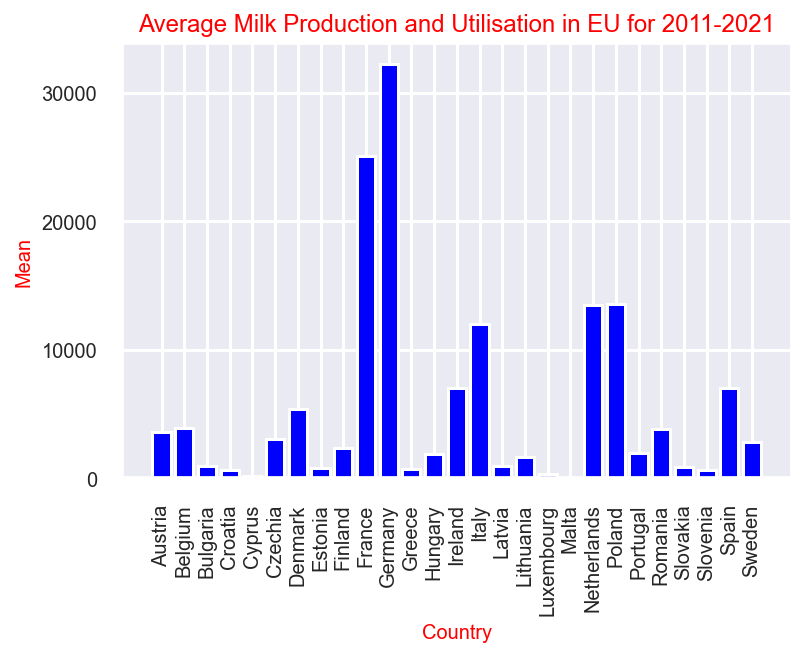

In [12]:
x = list(df2.Country)
y = list(df2.mean_rows)
plt.bar(x,y, color='blue')
plt.title('Average Milk Production and Utilisation in EU for 2011-2021', color='red', fontsize=12)
plt.xlabel('Country', color='red', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Mean', color='red', fontsize=10)
plt.show();

#### <div class="alert alert-warning"> Median of Milk Production and Utilisation in EU for 2011-2021</div>

In [13]:
#ax = sns.histplot(df1.mean_rows, kde=True, color ='blue')
#ax.set(xlabel='Country', ylabel='mean_rows', title ='Average Milk Production and Utilisation in EU for 2011-2021')

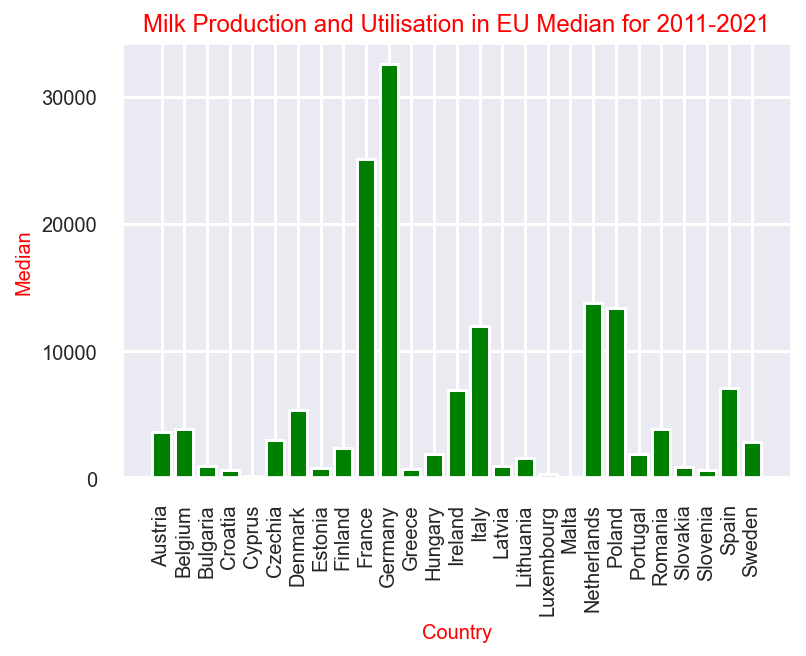

In [14]:
x = list(df2.Country)
y = list(df2.median_rows)
plt.bar(x,y, color='green')
plt.title('Milk Production and Utilisation in EU Median for 2011-2021', color='red', fontsize=12)
plt.xlabel('Country', color='red', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Median', color='red', fontsize=10)
plt.show();

#### <div class="alert alert-warning"> Variance of Milk Production and Utilisation in EU for 2011-2021</div>


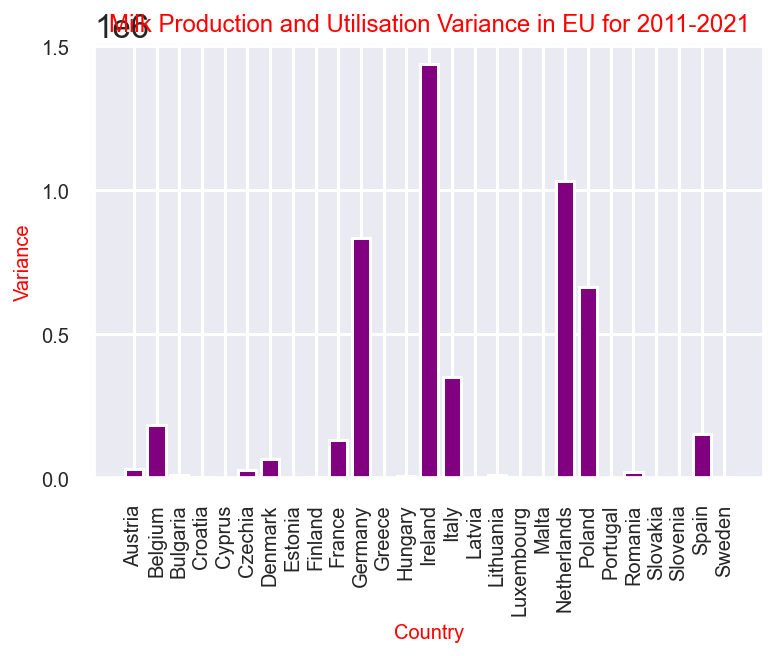

In [15]:
x = list(df2.Country)
y = list(df2.variance_rows)
plt.bar(x,y, color='purple')
plt.title('Milk Production and Utilisation Variance in EU for 2011-2021', color='red', fontsize=12)
plt.xlabel('Country', color='red', fontsize=10 )
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Variance', color='red', fontsize=10)
plt.show();

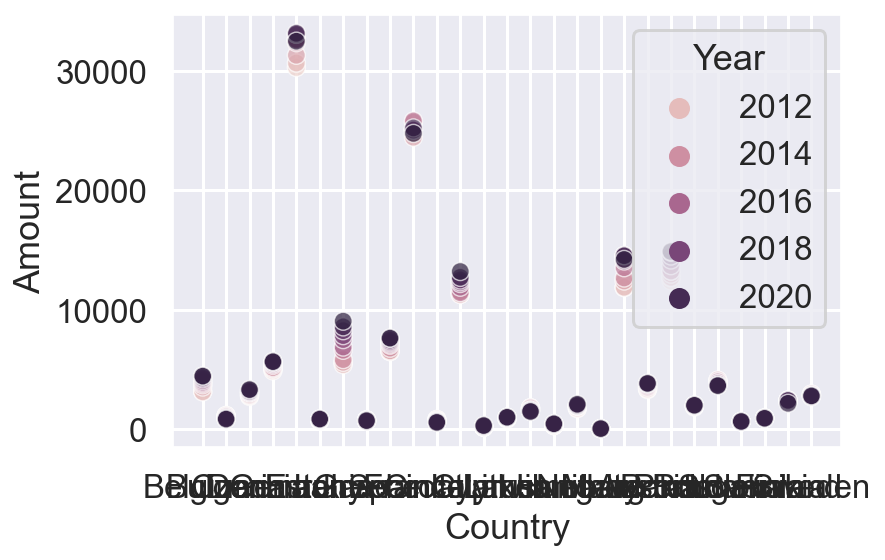

In [16]:
sns.scatterplot(data=df, x='Country', y='Amount', alpha=0.7, hue='Year');

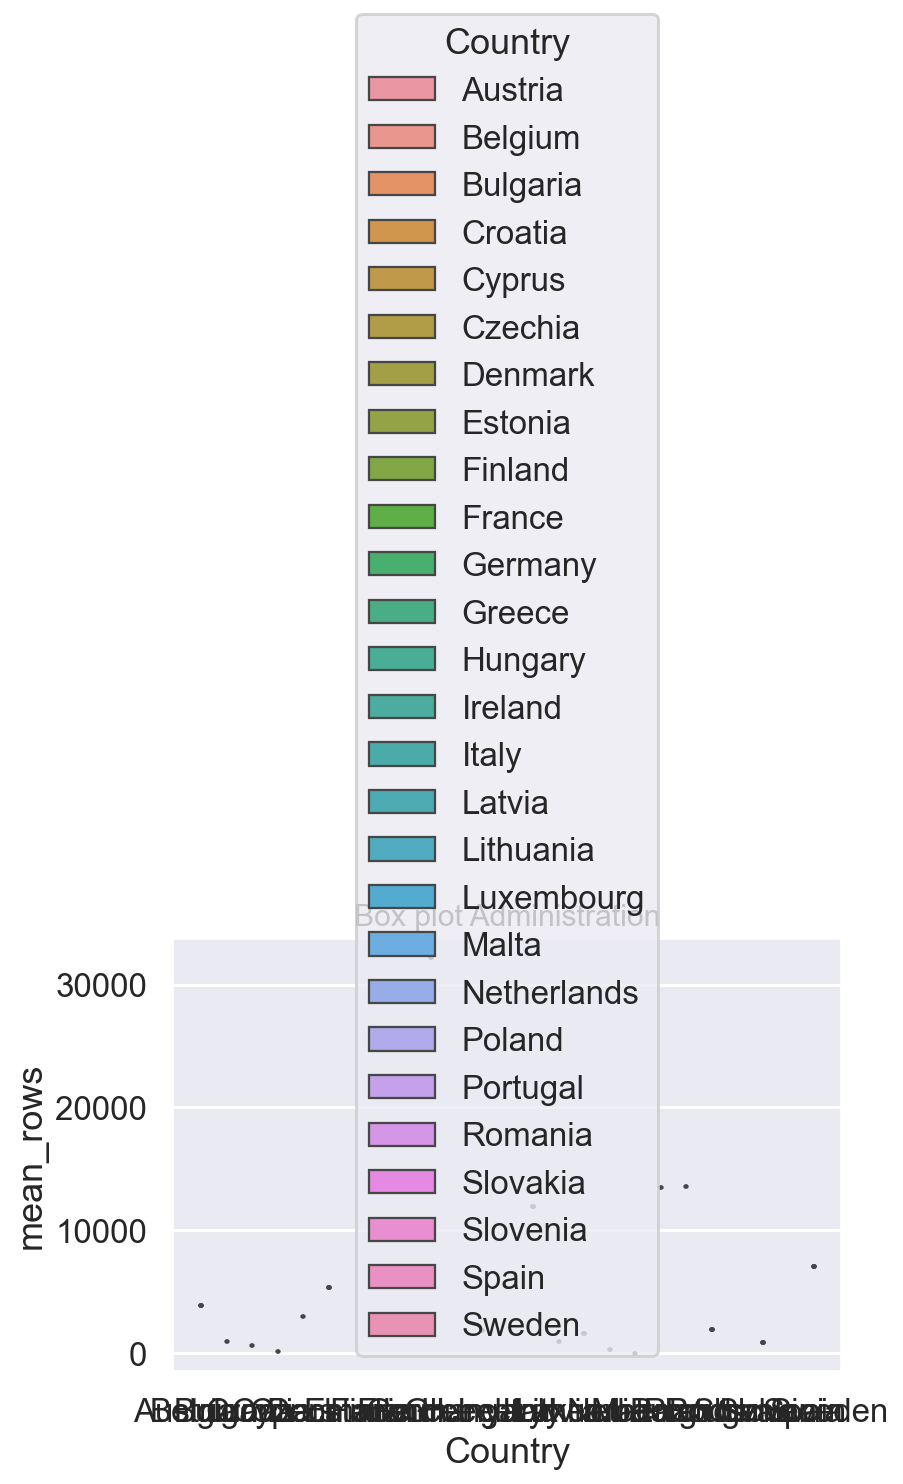

In [17]:
## trying to create a box plot
sns.boxplot(x ="Country", y ='mean_rows', data=df2, hue ='Country')
plt.title('Box plot Administration', fontsize=15);

*Boxplot output is not useful for the report

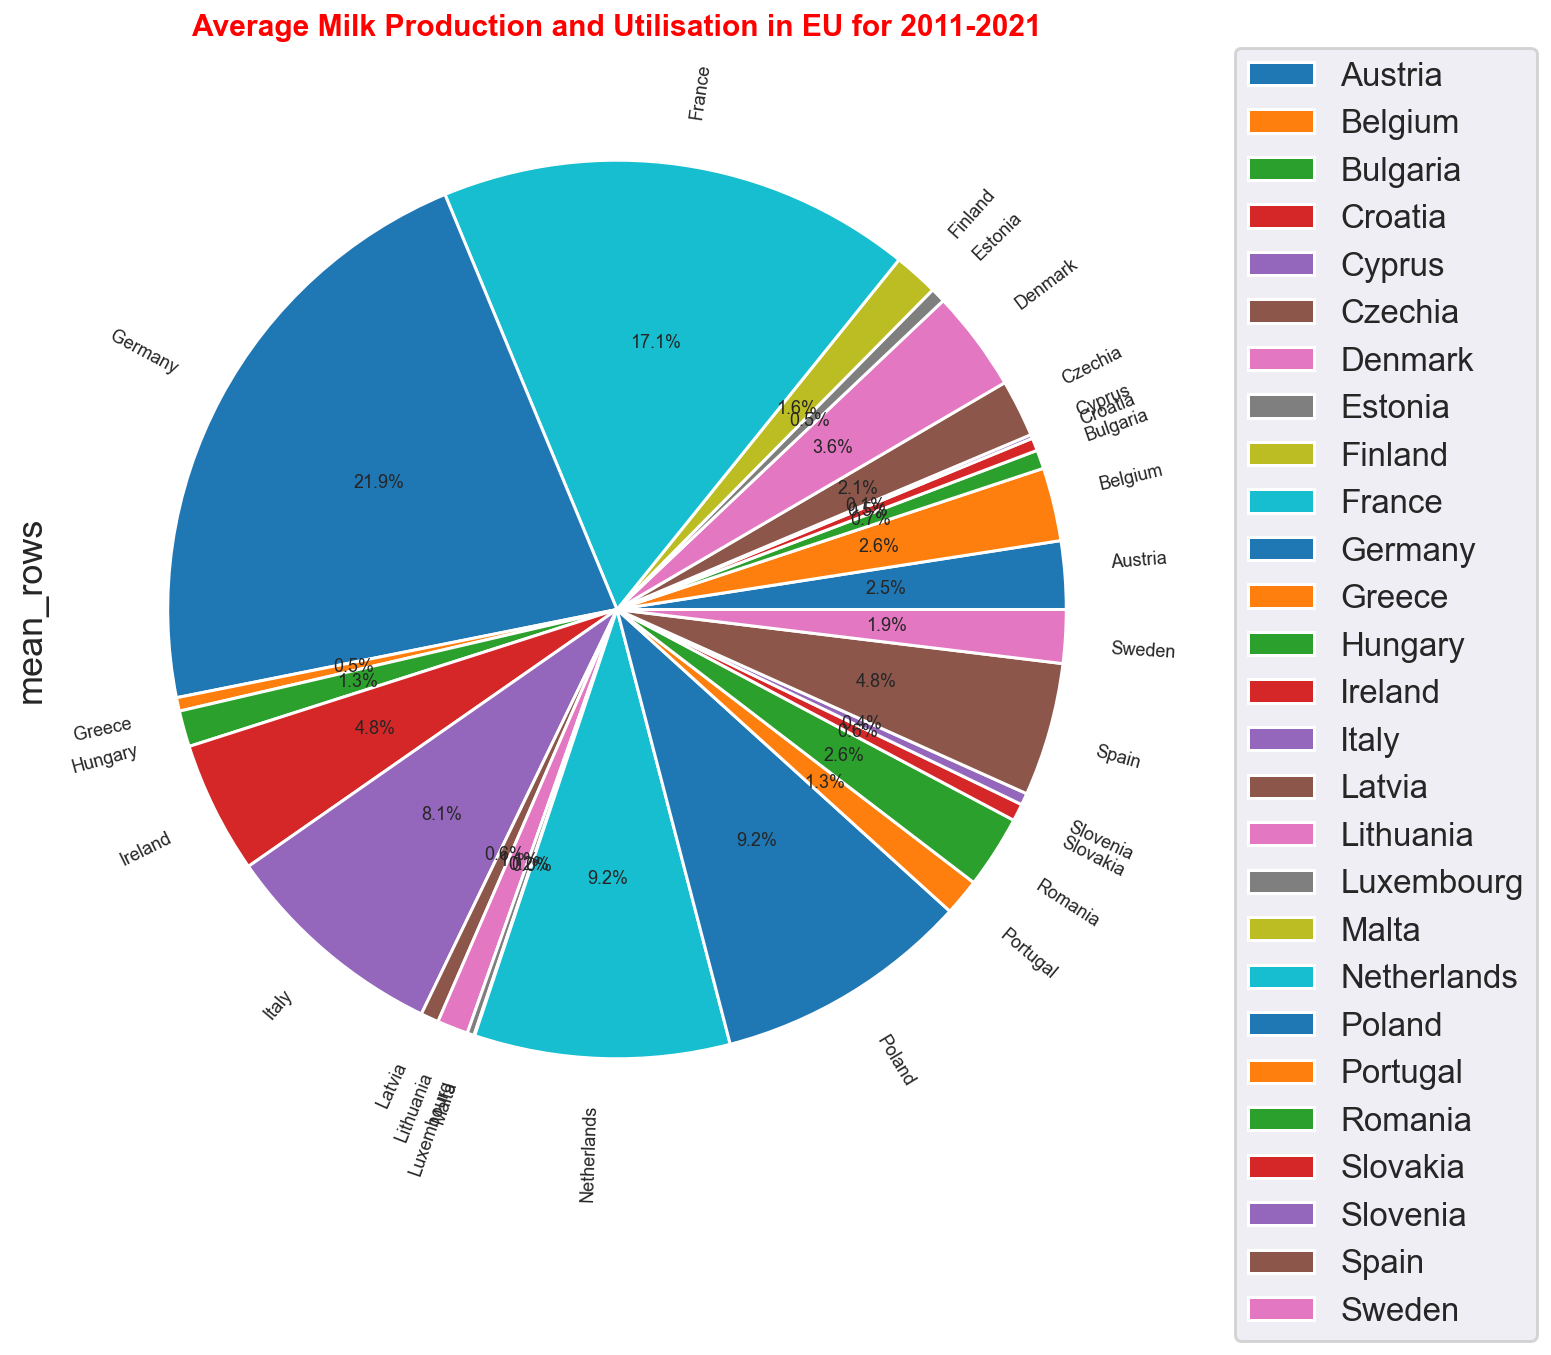

In [18]:
#plotting a pie chart

plot = df1.plot.pie(y='mean_rows', figsize=(15, 10), fontsize=9, legend=False, rotatelabels=True, autopct='%1.1f%%', colors=mcolors.TABLEAU_COLORS)
plt.title('Average Milk Production and Utilisation in EU for 2011-2021', weight='bold', size=15, color= 'red')
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

plt.show()
plt.clf()
plt.close();

#### <font color=barney>*B.2. Country: Ireland*</font>
(Cells below are focused on Ireland only.)

In [19]:
DS_Ireland= df.loc[df['Country']=='Ireland'] 
DS_Ireland

,Country,Year,Amount
6,Ireland,2011,5556.20
33,Ireland,2012,5399.30
60,Ireland,2013,5600.70
87,Ireland,2014,5821.30
114,Ireland,2015,6604.41
141,Ireland,2016,6871.94
168,Ireland,2017,7498.94
195,Ireland,2018,7831.25
222,Ireland,2019,8244.87
249,Ireland,2020,8561.47


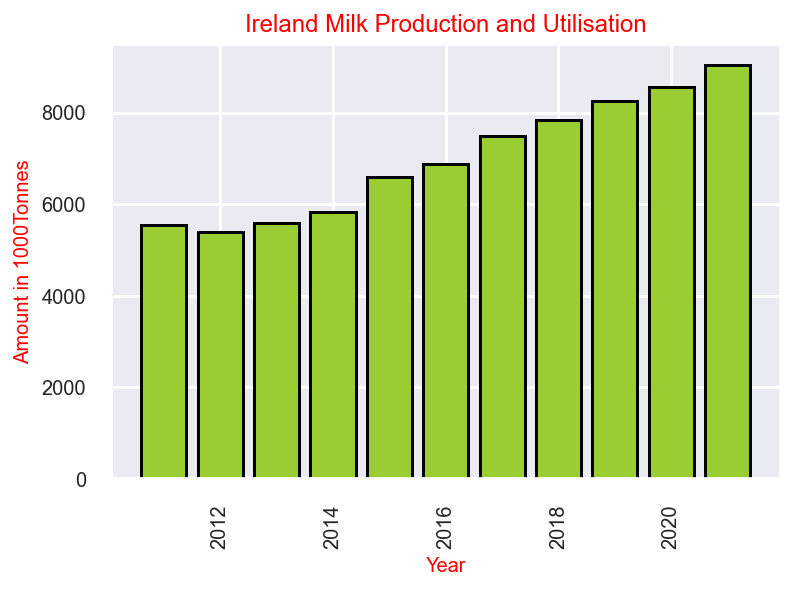

In [20]:
x = list(DS_Ireland.Year)
y = list(DS_Ireland.Amount)
plt.bar(x,y, color = "yellowgreen", ec="black")
plt.title('Ireland Milk Production and Utilisation', color='red', fontsize=12)
plt.xlabel('Year', color='red', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Amount in 1000Tonnes', color='red', fontsize=10)
plt.show();

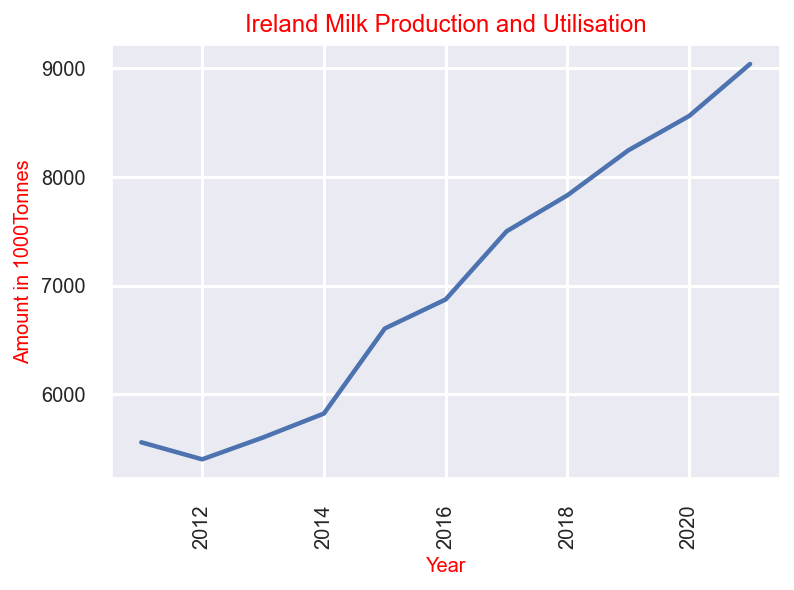

In [21]:
x = list(DS_Ireland.Year)
y = list(DS_Ireland.Amount)
plt.figure()
plt.plot(x, y)
plt.title('Ireland Milk Production and Utilisation', color='red', fontsize=12)
plt.xlabel('Year', color='red', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Amount in 1000Tonnes', color='red', fontsize=10)
plt.show();



###  <font color=blue>**C. Inferential Statistics**</font>

#### <font color=barney>*C.1. Country: Ireland*</font>
(Cells below are focused on Ireland only.)

##### C.1.1.  T-Test, one population

I am interested to test the average Milk produced in Tonnes in Ireland using T-Test. The mean of the amount of milk produced in Ireland for 2011 to 2021 was 7003000 Tonnes. I want to verify the mean if it is still the same if I just take into account the most recent 5 years (n=5). I chose 5 because that is the median of the sample population available. At a 5% significance level, I want to test amounts from 2017 to 2021.

In [22]:
DS_Ireland

,Country,Year,Amount
6,Ireland,2011,5556.20
33,Ireland,2012,5399.30
60,Ireland,2013,5600.70
87,Ireland,2014,5821.30
114,Ireland,2015,6604.41
141,Ireland,2016,6871.94
168,Ireland,2017,7498.94
195,Ireland,2018,7831.25
222,Ireland,2019,8244.87
249,Ireland,2020,8561.47


In [23]:
## getting the 5 most recent years data

IE_tail= DS_Ireland.tail(5)
IE_tail

,Country,Year,Amount
168,Ireland,2017,7498.94
195,Ireland,2018,7831.25
222,Ireland,2019,8244.87
249,Ireland,2020,8561.47
276,Ireland,2021,9039.99


In [24]:
IE_tail.shape

(5, 3)

In [25]:
# x is the amount (in Tonnes) of milk produced and utilised in Ireland

X=IE_tail['Amount']; X

168    7498.94
195    7831.25
222    8244.87
249    8561.47
276    9039.99
Name: Amount, dtype: float64

The mean value of milk produced and utilised in Ireland for 2011 to 2021 is 7003000 Tonnes. My null hypothesis is that 2017-2021 mean amount will also give 7003000 Tonnes.

In [26]:
#H0 : u = 7003
#H1 : u =! 7003
#stats.ttest_1samp(X,mu of H0)

stats.ttest_1samp(X,7003)

Ttest_1sampResult(statistic=4.561763386049194, pvalue=0.010325024198431444)

<font color=red>The P-value is less than 0.05, therefore, the null hypothesis is rejected and the alternative hypothesis is accepted. There is enough evidence to say that the mean amount of milk produced in Ireland for 5 years is not equal to 7003 Tonnes.

Now, I want to test if the mean amount of milk produced and utilised in Ireland for 5 years is less than 7003 Tonnes.

In [27]:
#H0 : u < 7003
#H1 : u > 7003
stats.t.sf(4.561763386049194, 4)

0.005162512099215722

<font color=red>The p-value I got is less than 0.05, therefore, I reject the null hypothesis. There is enough evidence to say that the mean amount of milk produced and utilised in Ireland is greater than 7003.

#### I want to determine if the data for Ireland is normally distributed or not so I can compare for ANOVA test

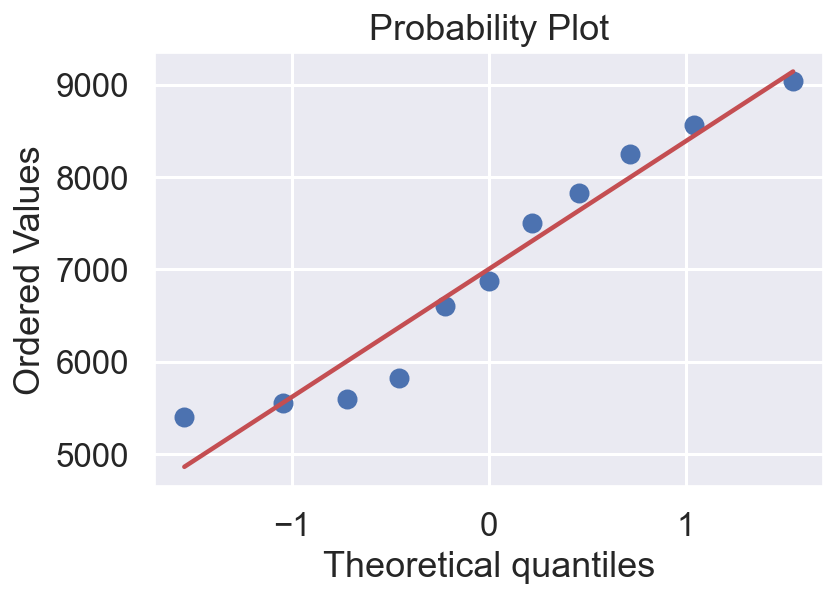

<Figure size 432x288 with 0 Axes>

In [28]:
#Normality plot. The variable is "Amount"

stats.probplot(DS_Ireland.Amount, plot=plt)
plt.figure();

In [29]:
#Shapiro wilk test to test Normality

stats.shapiro(DS_Ireland.Amount)

ShapiroResult(statistic=0.919398307800293, pvalue=0.3136608302593231)

<font color=red>The p-value is greater than 0.05,therefore, the null hypothesis cannot be rejected. There is enough evidence that the data came from a normally distributed population.

#### <font color=barney>*C.2. Country: EU*</font>


#### C.2.1.  T-Test, Two-Population

I am interested to compare the mean milk production of Ireland and  Netherlands, if they are similar, at a 5% significance level.

In [30]:
df.head(5)

,Country,Year,Amount
0,Belgium,2011,3151.00
1,Bulgaria,2011,1126.00
2,Czechia,2011,2735.93
3,Denmark,2011,4879.50
4,Germany,2011,30301.36


In [31]:
DS_Neth= df.loc[df['Country']=='Netherlands'] 
DS_Neth

,Country,Year,Amount
18,Netherlands,2011,11850.72
45,Netherlands,2012,11880.95
72,Netherlands,2013,12407.69
99,Netherlands,2014,12660.35
126,Netherlands,2015,13522.12
153,Netherlands,2016,14531.00
180,Netherlands,2017,14501.00
207,Netherlands,2018,14090.00
234,Netherlands,2019,14555.00
261,Netherlands,2020,14522.00


In [32]:
DS_Ireland

,Country,Year,Amount
6,Ireland,2011,5556.20
33,Ireland,2012,5399.30
60,Ireland,2013,5600.70
87,Ireland,2014,5821.30
114,Ireland,2015,6604.41
141,Ireland,2016,6871.94
168,Ireland,2017,7498.94
195,Ireland,2018,7831.25
222,Ireland,2019,8244.87
249,Ireland,2020,8561.47


In [33]:
DS_Ireland.info()
DS_Neth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 6 to 276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  11 non-null     object 
 1   Year     11 non-null     int64  
 2   Amount   11 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 352.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 18 to 288
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  11 non-null     object 
 1   Year     11 non-null     int64  
 2   Amount   11 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 352.0+ bytes


In [34]:
concatenated = pd.concat([DS_Ireland, DS_Neth,]) 

In [35]:
concatenated

,Country,Year,Amount
6,Ireland,2011,5556.20
33,Ireland,2012,5399.30
60,Ireland,2013,5600.70
87,Ireland,2014,5821.30
114,Ireland,2015,6604.41
141,Ireland,2016,6871.94
168,Ireland,2017,7498.94
195,Ireland,2018,7831.25
222,Ireland,2019,8244.87
249,Ireland,2020,8561.47


In [36]:
concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 6 to 288
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  22 non-null     object 
 1   Year     22 non-null     int64  
 2   Amount   22 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 704.0+ bytes


In [37]:
#Group the data according to Country

Ire = concatenated.query('Country== "Ireland" ')['Amount']
Neth = concatenated.query('Country== "Netherlands" ')['Amount']

In [38]:
#perform the test assuming as H0 that mu1 = mu2 (Ireland = Netherlands)

test = stats.ttest_ind(Ire, Neth, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=-12.571803128685776, pvalue=5.946759554448314e-11)

In [39]:

test = stats.ttest_ind(Ire, Neth, 
                      equal_var=False)

display(test)

Ttest_indResult(statistic=-12.571803128685776, pvalue=8.581541383403144e-11)

<font color=red>The p-value is less than the threshold (alpha=0.05), then there is evidence against the null hypothesis of equal population means.
Ireland sample mean is not equal to Netherlands sample mean.


#### C.2.2.  ANOVA Test

In [40]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [41]:
ireland_amount= DS_Ireland.Amount

In [42]:
netherlands_amount= DS_Neth.Amount

In [43]:
levene(ireland_amount, netherlands_amount)

LeveneResult(statistic=0.40755685984169915, pvalue=0.5304552206004394)

<font color=red>p-value from Levene test is greater than 0.05, therefore, the variances are assumed to be equal

In [44]:
concatenated['Amount'] = pd.to_numeric(concatenated['Amount'])

In [45]:
#ONE-WAY ANOVA
model = ols('Amount ~ Country', data = concatenated).fit()
aov = sm.stats.anova_lm(model, type=1)
print(aov)

            df        sum_sq       mean_sq           F        PR(>F)
Country    1.0  2.337271e+08  2.337271e+08  158.050234  5.946760e-11
Residual  20.0  2.957630e+07  1.478815e+06         NaN           NaN


<font color=red>The null hypothsis is rejected. There is enough evidence that Ireland and Netherlands' mean milk production are not the same, at 5% significance level.


#### C.2.3.  Mann Whitney U Test

In [46]:
from scipy.stats import mannwhitneyu

In [47]:
mannwhitneyu(Ire, Neth)

MannwhitneyuResult(statistic=0.0, pvalue=8.151536127743244e-05)

p-value is greater than 0.05, therefore, null hypothesis is rejected. There is enough evidence that the milk production in Ireland is not equal to the milk production in Netherlands. 

#### C.2.4.  Kruskal-Wallis H test

In [48]:
!pip install pandas

In [49]:
import pandas as pd

In [50]:
Ire.unique()

array([5556.2 , 5399.3 , 5600.7 , 5821.3 , 6604.41, 6871.94, 7498.94,
       7831.25, 8244.87, 8561.47, 9039.99])

In [51]:
Neth.unique()

array([11850.72, 11880.95, 12407.69, 12660.35, 13522.12, 14531.  ,
       14501.  , 14090.  , 14555.  , 14522.  , 14217.25])

To perform the Kruskal-Wallis test, make use of the 'kruskal' function from the 'pingouin' package. So we'll have to import that first:

In [52]:
!pip install pingouin

In [53]:
from pingouin import kruskal
from scipy.stats import kruskal


H0: The median of Milk Production in Ireland is equal to the median of milk production in Netherlands.

H1: The medians are not equal

In [54]:
kruskal(Ire, Neth)

KruskalResult(statistic=15.782608695652172, pvalue=7.105263288600166e-05)

The p-value is less than 0.05, therefore, the null hypothesis is rejected. There is enough evidence to say that the medians are statistically not equal.

#### C.2.5.  Linear Regression

In [55]:
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [76]:
correlation= df2.corr()
print(correlation)

Year               2011      2012      2013      2014      2015      2016  \
Year                                                                        
2011           1.000000  0.999840  0.999413  0.999640  0.999037  0.997535   
2012           0.999840  1.000000  0.999705  0.999750  0.999132  0.997858   
2013           0.999413  0.999705  1.000000  0.999910  0.999646  0.998828   
2014           0.999640  0.999750  0.999910  1.000000  0.999637  0.998486   
2015           0.999037  0.999132  0.999646  0.999637  1.000000  0.999446   
2016           0.997535  0.997858  0.998828  0.998486  0.999446  1.000000   
2017           0.996855  0.997239  0.998206  0.997784  0.999017  0.999783   
2018           0.996547  0.997067  0.998037  0.997578  0.998750  0.999355   
2019           0.995359  0.995898  0.996985  0.996440  0.997991  0.998974   
2020           0.994914  0.995446  0.996485  0.995933  0.997544  0.998523   
2021           0.993377  0.993959  0.994862  0.994221  0.995988  0.997210   

<Figure size 1296x1008 with 0 Axes>

<AxesSubplot:xlabel='Year', ylabel='Year'>

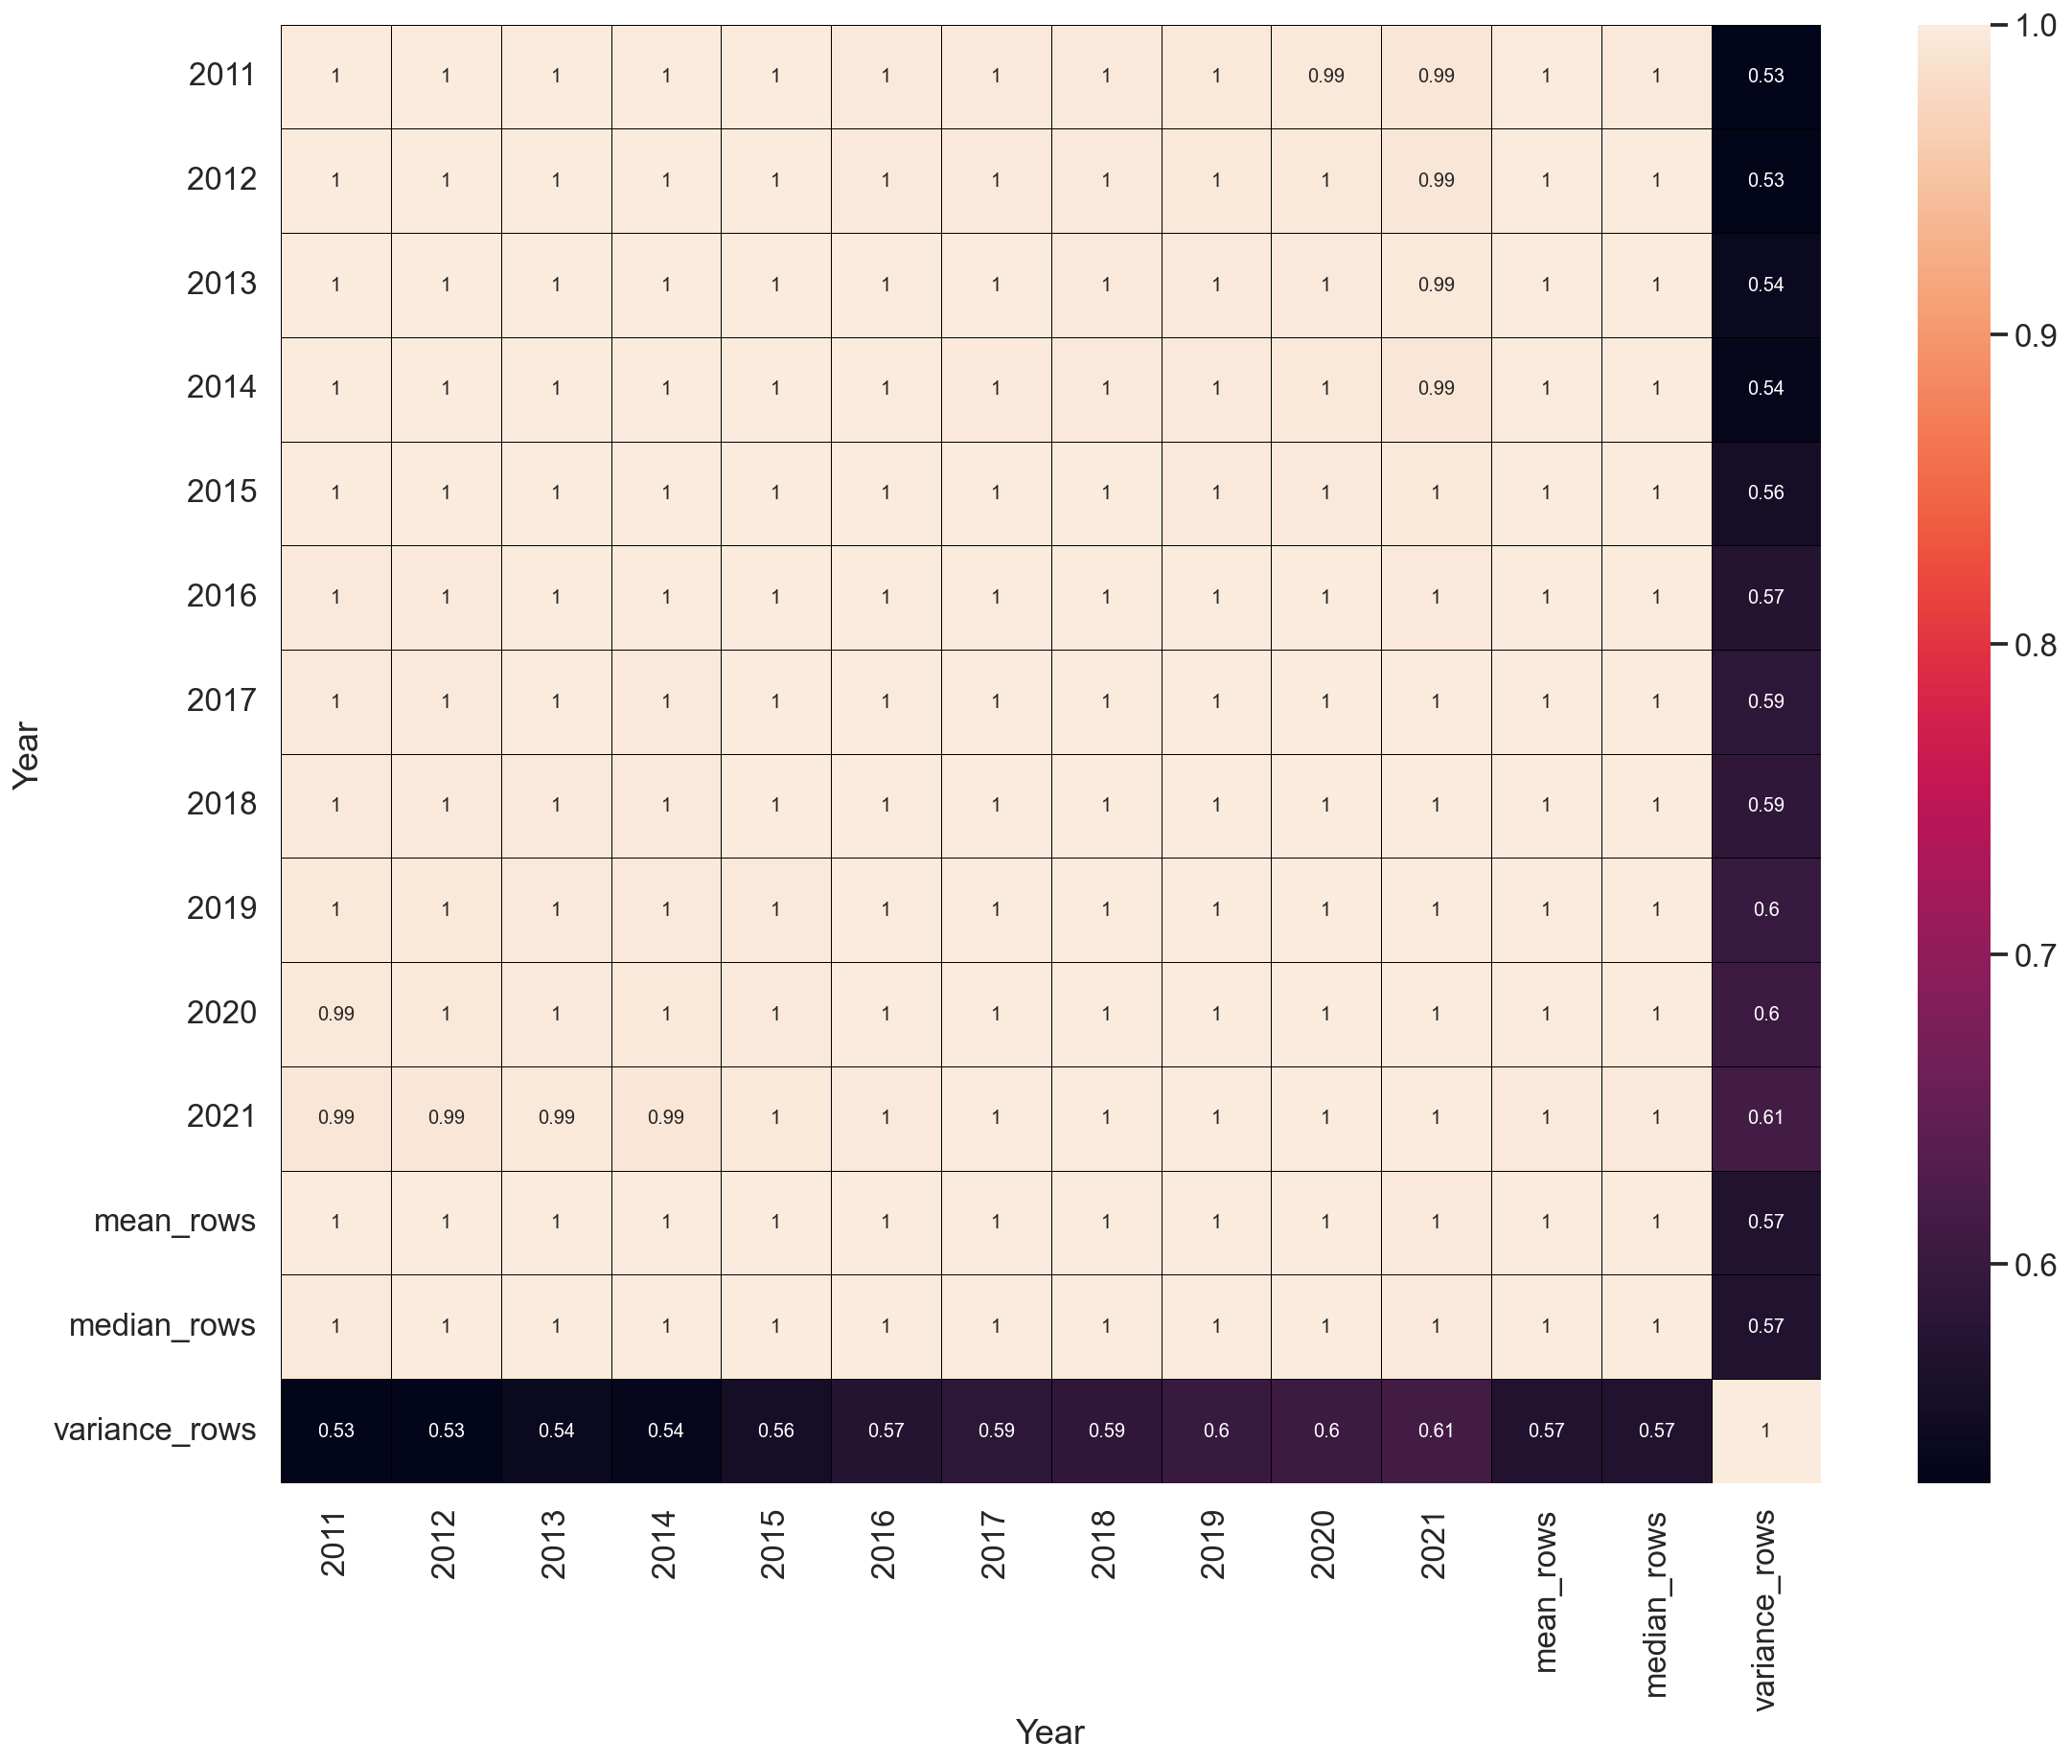

In [77]:
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="black",lw=0.5)

The correlations between the years and the values are positively correlated, which means as one increases the other will increase too. The relationships are strong. It can be inferred that there is a big probability that the amount of milk produced will be increasing every year.

#### Linear Regression for Ireland

In [58]:
DS_Ireland_lr = DS_Ireland.drop('Country',axis=1)
DS_Ireland_lr 

,Year,Amount
6,2011,5556.20
33,2012,5399.30
60,2013,5600.70
87,2014,5821.30
114,2015,6604.41
141,2016,6871.94
168,2017,7498.94
195,2018,7831.25
222,2019,8244.87
249,2020,8561.47


In [59]:
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(DS_Ireland_lr ),columns=DS_Ireland_lr.columns)

In [60]:
df_scale.head()

,Year,Amount
0,-1.581139,-1.154938
1,-1.264911,-1.280207
2,-0.948683,-1.119409
3,-0.632456,-0.943281
4,-0.316228,-0.318044


In [61]:
y=DS_Ireland_lr['Amount']
x = df_scale.drop(['Amount'],axis=1)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state= 40)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8, 1)
(3, 1)
(8,)
(3,)


In [64]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [65]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [66]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.9771931462509852
-----Test set statistics-----
R-squared of the model in test set is: 0.9269312717920057
Root mean squared error of the prediction is: 272.97319877195537
Mean absolute percentage error of the prediction is: 3.218684197127084


A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.

#### Linear Regression for Netherlands

In [67]:
DS_Neth_lr = DS_Neth.drop('Country',axis=1)
DS_Neth_lr 

,Year,Amount
18,2011,11850.72
45,2012,11880.95
72,2013,12407.69
99,2014,12660.35
126,2015,13522.12
153,2016,14531.00
180,2017,14501.00
207,2018,14090.00
234,2019,14555.00
261,2020,14522.00


In [68]:
scaler = StandardScaler()

df_scale_nt = pd.DataFrame(scaler.fit_transform(DS_Neth_lr ),columns=DS_Neth_lr.columns)

In [69]:
df_scale_nt.head()

,Year,Amount
0,-1.581139,-1.578877
1,-1.264911,-1.550313
2,-0.948683,-1.052589
3,-0.632456,-0.813847
4,-0.316228,0.000450


In [70]:
y=DS_Neth_lr['Amount']
x = df_scale_nt.drop(['Amount'],axis=1)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state= 40)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8, 1)
(3, 1)
(8,)
(3,)


In [73]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [74]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [75]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.7692487070827245
-----Test set statistics-----
R-squared of the model in test set is: 0.8895436730256527
Root mean squared error of the prediction is: 257.4176011118543
Mean absolute percentage error of the prediction is: 1.8750658741178432


The R-squared of the Linear regression model of Ireland is greater than that of the Netherlands. Ireland dataset fits better in regression model.